In [25]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

### UPDATE ME

In [37]:
DATA_FILE = 'imbalance_forecast.csv'
X_COL = 'datetime_utc'
Y_COL = 'price_eur_mwh'

### DO NOT UPDATE ANYTHING BELOW THIS

In [38]:
DATA_PATH = Path.cwd().parent / 'data'
FULL_PATH_DATA_FILE = DATA_PATH / DATA_FILE

In [39]:
# Read the dataframe
df = pd.read_csv(FULL_PATH_DATA_FILE)
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

# Print its size
df.shape

(105949, 6)

In [40]:
df.dtypes

datetime_utc     datetime64[ns]
date                     object
hour                      int64
minute                    int64
second                    int64
price_eur_mwh           float64
dtype: object

In [41]:
# Filter the dataset to only a certain number of entries per day and max number of entries total
num_entries_selected_per_day = 1
hours_between_selected = 24 / num_entries_selected_per_day

max_number_entries = 50

df_reduced = df[(df['hour'] % hours_between_selected == 0) & (df['minute'] == 0)][:max_number_entries]

In [42]:
df_reduced.shape

(50, 6)

In [43]:
df_reduced.head()

,datetime_utc,date,hour,minute,second,price_eur_mwh
500,2025-07-25,2025-07-25,0,0,0,79.35
1710,2025-07-26,2025-07-26,0,0,0,100.00
4142,2025-07-28,2025-07-28,0,0,0,77.00
5279,2025-07-29,2025-07-29,0,0,0,47.87
6493,2025-07-30,2025-07-30,0,0,0,47.14


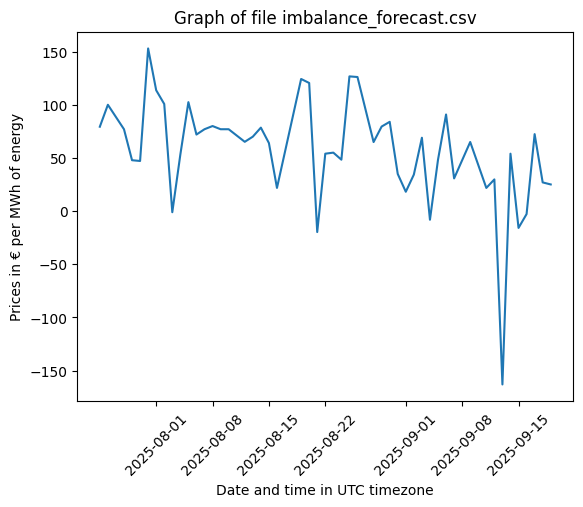

In [44]:
x = df_reduced[X_COL]
y = df_reduced[Y_COL]

plt.plot(x, y)
plt.xlabel('Date and time in UTC timezone')
plt.xticks(rotation=45)
plt.ylabel('Prices in € per MWh of energy')
plt.title(f'Graph of file {DATA_FILE}')
plt.show()

In [85]:
file_name_quarter_hourly = 'weather_data-quarter_hourly.csv'
file_name_hourly = 'weather_data-hourly.csv'
''' Extra info on the file:
latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
50.854,4.35,28.0,3600,Europe/Berlin,GMT+1
'''

def load_weather_data(file_name: str) -> pd.DataFrame:
    DATA_PATH = Path.cwd().parent / 'data'
    PATH_TO_DATA_FILE = DATA_PATH / file_name
    
    weather_df = pd.read_csv(PATH_TO_DATA_FILE)
    weather_df['time'] = pd.to_datetime(weather_df['time'])

    # convert time to UTC time
    timezone = 'Europe/Berlin'
    weather_df['datetime_utc'] = (
        weather_df['time']
        .dt.tz_localize(timezone, ambiguous='NaT', nonexistent='shift_forward')
        .dt.tz_convert('UTC')
    )

    return weather_df

In [86]:
weather_df_hourly = load_weather_data(file_name_hourly)
print(weather_df_hourly.shape)
weather_df_hourly.head()

(12600, 4)


,time,surface_pressure (hPa),cloud_cover (%),datetime_utc
0,2024-05-21 00:00:00,1006.0,85,2024-05-20 22:00:00+00:00
1,2024-05-21 01:00:00,1005.7,20,2024-05-20 23:00:00+00:00
2,2024-05-21 02:00:00,1005.5,100,2024-05-21 00:00:00+00:00
3,2024-05-21 03:00:00,1005.2,100,2024-05-21 01:00:00+00:00
4,2024-05-21 04:00:00,1004.9,100,2024-05-21 02:00:00+00:00


In [87]:
weather_df_quarter_hourly = load_weather_data(file_name_quarter_hourly)
print(weather_df_quarter_hourly.shape)
weather_df_quarter_hourly.head()

(50400, 14)


,time,temperature_2m (°C),rain (mm),snowfall (cm),snowfall_height (m),sunshine_duration (s),wind_speed_10m (km/h),direct_normal_irradiance (W/m²),direct_normal_irradiance_instant (W/m²),precipitation (mm),weather_code (wmo code),is_day (),relative_humidity_2m (%),datetime_utc
0,2024-05-21 00:00:00,12.4,0.0,0.0,2130.0,0.0,5.8,0.0,0.0,0.0,3,0,96,2024-05-20 22:00:00+00:00
1,2024-05-21 00:15:00,12.3,0.0,0.0,2120.0,0.0,5.8,0.0,0.0,0.0,2,0,96,2024-05-20 22:15:00+00:00
2,2024-05-21 00:30:00,12.1,0.0,0.0,2120.0,0.0,6.0,0.0,0.0,0.0,1,0,96,2024-05-20 22:30:00+00:00
3,2024-05-21 00:45:00,11.9,0.0,0.0,2110.0,0.0,6.1,0.0,0.0,0.0,1,0,96,2024-05-20 22:45:00+00:00
4,2024-05-21 01:00:00,11.9,0.0,0.0,2100.0,0.0,6.4,0.0,0.0,0.0,1,0,97,2024-05-20 23:00:00+00:00


In [88]:
def load_data(file_name: str) -> pd.DataFrame:
    DATA_PATH = Path.cwd().parent / 'data'
    df = pd.read_csv(DATA_PATH / file_name)
    df['datetime_utc'] = pd.to_datetime(df['datetime_utc']).dt.tz_localize('UTC')
    return df

def reduce_data(df: pd.DataFrame, num_entries_per_day: int) -> pd.DataFrame:
    # Filter the dataset to only a certain number of entries per day
    hours_between_selected = 24 / num_entries_per_day
    df_reduced = df[(df['hour'] % hours_between_selected == 0) & (df['minute'] == 0)]
    return df_reduced

In [89]:
df_actual_price = load_data('imbalance_actual.csv')
print(f'Loaded actual data with shape {df_actual_price.shape}')
df_actual_price_reduced = reduce_data(df_actual_price, num_entries_per_day=1)
print(f'Reduced actual data to shape {df_actual_price_reduced.shape}')
print()

Loaded actual data with shape (49559, 5)
Reduced actual data to shape (517, 5)



In [99]:
df_combined = df_actual_price.merge(weather_df_quarter_hourly, on='datetime_utc', how='left')
df_combined = df_combined.merge(weather_df_hourly, on='datetime_utc', how='left')
print(df_combined.shape)
df_combined.head()

(49568, 21)


,datetime_utc,date,hour,minute,price_eur_mwh,time_x,temperature_2m (°C),rain (mm),snowfall (cm),snowfall_height (m),...,wind_speed_10m (km/h),direct_normal_irradiance (W/m²),direct_normal_irradiance_instant (W/m²),precipitation (mm),weather_code (wmo code),is_day (),relative_humidity_2m (%),time_y,surface_pressure (hPa),cloud_cover (%)
0,2024-05-21 22:00:00+00:00,2024-05-21,22,0,106.39,2024-05-22 00:00:00,13.9,0.0,0.0,2320.0,...,10.8,0.0,0.0,0.0,3.0,0.0,94.0,2024-05-22 00:00:00,1003.3,100.0
1,2024-05-21 22:15:00+00:00,2024-05-21,22,15,149.28,2024-05-22 00:15:00,13.9,0.0,0.0,2280.0,...,11.3,0.0,0.0,0.0,3.0,0.0,93.0,NaT,NaN,NaN
2,2024-05-21 22:30:00+00:00,2024-05-21,22,30,151.17,2024-05-22 00:30:00,13.8,0.0,0.0,2250.0,...,11.8,0.0,0.0,0.0,3.0,0.0,93.0,NaT,NaN,NaN
3,2024-05-21 22:45:00+00:00,2024-05-21,22,45,226.60,2024-05-22 00:45:00,13.6,0.0,0.0,2210.0,...,12.3,0.0,0.0,0.0,3.0,0.0,93.0,NaT,NaN,NaN
4,2024-05-21 23:00:00+00:00,2024-05-21,23,0,204.76,2024-05-22 01:00:00,13.5,0.0,0.0,2170.0,...,12.2,0.0,0.0,0.0,3.0,0.0,93.0,2024-05-22 01:00:00,1002.7,100.0


In [100]:
df_combined[df_combined['temperature_2m (°C)'].isna()]

,datetime_utc,date,hour,minute,price_eur_mwh,time_x,temperature_2m (°C),rain (mm),snowfall (cm),snowfall_height (m),...,wind_speed_10m (km/h),direct_normal_irradiance (W/m²),direct_normal_irradiance_instant (W/m²),precipitation (mm),weather_code (wmo code),is_day (),relative_humidity_2m (%),time_y,surface_pressure (hPa),cloud_cover (%)
15176,2024-10-27 00:00:00+00:00,2024-10-27,0,0,412.66,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15177,2024-10-27 00:15:00+00:00,2024-10-27,0,15,379.45,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15178,2024-10-27 00:30:00+00:00,2024-10-27,0,30,377.77,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15179,2024-10-27 00:45:00+00:00,2024-10-27,0,45,339.32,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15180,2024-10-27 01:00:00+00:00,2024-10-27,1,0,-629.42,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15181,2024-10-27 01:15:00+00:00,2024-10-27,1,15,-614.44,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15182,2024-10-27 01:30:00+00:00,2024-10-27,1,30,-631.35,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
15183,2024-10-27 01:45:00+00:00,2024-10-27,1,45,-637.87,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [108]:
def plot_data(x_label: str, y_label: str, data: pd.DataFrame):
    # Drop any entries where x or y is none
    data_copy = data[[x_label, y_label]].copy().dropna()
    
    x = data_copy[x_label]
    y = data_copy[y_label]
    
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

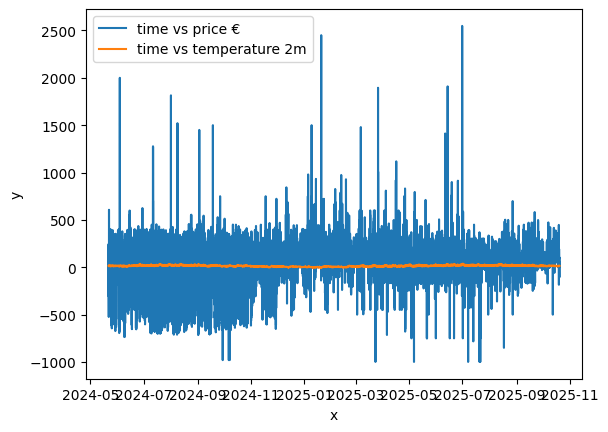

In [109]:
x = df_combined['datetime_utc']
y1 = df_combined['price_eur_mwh']
y2 = df_combined['temperature_2m (°C)']
plt.plot(x, y1, label='time vs price €')
plt.plot(x, y2, label='time vs temperature 2m')  # same y, different x
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [148]:
df_combined.columns

Index(['datetime_utc', 'date', 'hour', 'minute', 'price_eur_mwh', 'time_x',
       'temperature_2m (°C)', 'rain (mm)', 'snowfall (cm)',
       'snowfall_height (m)', 'sunshine_duration (s)', 'wind_speed_10m (km/h)',
       'direct_normal_irradiance (W/m²)',
       'direct_normal_irradiance_instant (W/m²)', 'precipitation (mm)',
       'weather_code (wmo code)', 'is_day ()', 'relative_humidity_2m (%)',
       'time_y', 'surface_pressure (hPa)', 'cloud_cover (%)'],
      dtype='object')

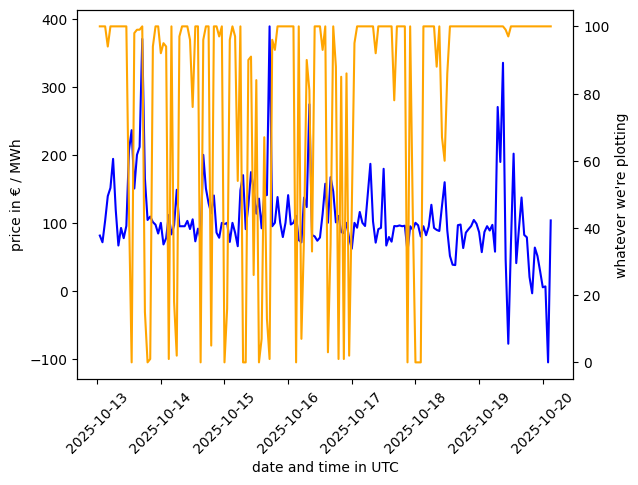

In [150]:
'''
- temperature --> seems somewhat correlated based on 7 day view
- sunshine --> possibly correlated based on 7 day view
- irradiance --> possibly correlated

- windspeed --> potentially, unsure

- cloud cover --> doesn't seem so
- rain --> 75% only zero, so kinda useless
- snowfall --> always zero
- snowfall height --> weird values
'''
graph_df = df_combined[df_combined['datetime_utc'] > pd.Timestamp('2025-10-13T00:00', tz='UTC')]
graph_df = graph_df.dropna(subset=['datetime_utc', 'cloud_cover (%)'])

x = graph_df['datetime_utc']
y1 = graph_df['price_eur_mwh']
y2 = graph_df['cloud_cover (%)']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('date and time in UTC')
ax1.set_ylabel('price in € / MWh')

plt.xticks(rotation=45)

ax2 = ax1.twinx()                 # second x-axis on top
ax2.plot(x, y2, color='orange')
ax2.set_ylabel('whatever we\'re plotting')

plt.show()

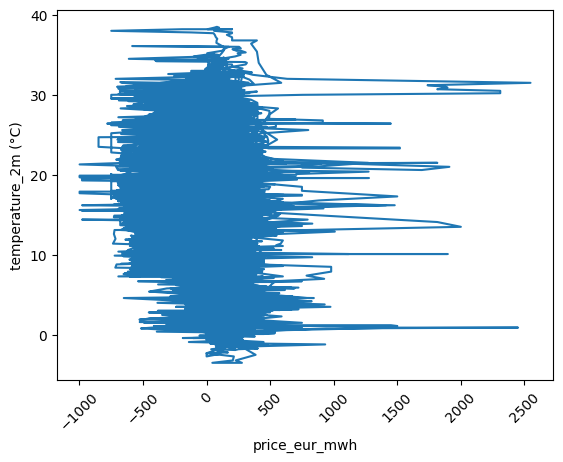

In [106]:
plot_data('price_eur_mwh', 'temperature_2m (°C)', df_combined)

In [213]:
def cleanup_datetime_gui_dayahead(df: pd.DataFrame, dt_range_label: str) -> pd.DataFrame:
    df['start_time'] = df[dt_range_label].str.split(' - ', n=1).str[0]
    df['end_time'] = df[dt_range_label].str.split(' - ', n=1).str[1]

    df['start_time'] = df['start_time'].str.replace(r'\s*\((?:CEST|CET)\)\s*$', '', regex=True)
    df['end_time'] = df['end_time'].str.replace(r'\s*\((?:CEST|CET)\)\s*$', '', regex=True)

    df['start_time'] = pd.to_datetime(df['start_time'], dayfirst=True)
    df['end_time'] = pd.to_datetime(df['end_time'], dayfirst=True)

    return df

def load_gui_dayahead_data(file_name: str, datetime_label: str) -> pd.DataFrame:
    DATA_PATH = Path.cwd().parent / 'data'
    PATH_TO_DATA_FILE = DATA_PATH / file_name
    
    df = pd.read_csv(PATH_TO_DATA_FILE)
    df = cleanup_datetime_gui_dayahead(df, datetime_label)
    
    # convert time to UTC time
    timezone = 'Europe/Berlin'
    df['start_datetime_utc'] = (
        df['start_time']
        .dt.tz_localize(timezone, ambiguous='NaT', nonexistent='shift_forward')
        .dt.tz_convert('UTC')
    )
    df['end_datetime_utc'] = (
        df['end_time']
        .dt.tz_localize(timezone, ambiguous='NaT', nonexistent='shift_forward')
        .dt.tz_convert('UTC')
    )

    return df

In [199]:
file_name = 'GUI_TOTAL_LOAD_DAYAHEAD_202510132200-202510202200.csv'

gui_dayahead = load_gui_dayahead_data(file_name, 'MTU (CET/CEST)')
gui_dayahead['datetime_utc'] = gui_dayahead['end_datetime_utc']
print(gui_dayahead.shape)
gui_dayahead.head()

(672, 9)


,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW),start_time,end_time,start_datetime_utc,end_datetime_utc,datetime_utc
0,14/10/2025 00:00 - 14/10/2025 00:15,Belgium (BE),8170.94,8000.84,2025-10-14 00:00:00,2025-10-14 00:15:00,2025-10-13 22:00:00+00:00,2025-10-13 22:15:00+00:00,2025-10-13 22:15:00+00:00
1,14/10/2025 00:15 - 14/10/2025 00:30,Belgium (BE),8052.20,7878.04,2025-10-14 00:15:00,2025-10-14 00:30:00,2025-10-13 22:15:00+00:00,2025-10-13 22:30:00+00:00,2025-10-13 22:30:00+00:00
2,14/10/2025 00:30 - 14/10/2025 00:45,Belgium (BE),8163.29,7828.68,2025-10-14 00:30:00,2025-10-14 00:45:00,2025-10-13 22:30:00+00:00,2025-10-13 22:45:00+00:00,2025-10-13 22:45:00+00:00
3,14/10/2025 00:45 - 14/10/2025 01:00,Belgium (BE),8129.49,7755.60,2025-10-14 00:45:00,2025-10-14 01:00:00,2025-10-13 22:45:00+00:00,2025-10-13 23:00:00+00:00,2025-10-13 23:00:00+00:00
4,14/10/2025 01:00 - 14/10/2025 01:15,Belgium (BE),7875.64,7582.13,2025-10-14 01:00:00,2025-10-14 01:15:00,2025-10-13 23:00:00+00:00,2025-10-13 23:15:00+00:00,2025-10-13 23:15:00+00:00


In [200]:
start = gui_dayahead['datetime_utc'].min()
end   = gui_dayahead['datetime_utc'].max()
print(start, '\n', end)

gui_dayahead['datetime_utc'].describe()

2025-10-13 22:15:00+00:00 
 2025-10-20 22:00:00+00:00


count                          672
mean     2025-10-17 10:07:30+00:00
min      2025-10-13 22:15:00+00:00
25%      2025-10-15 16:11:15+00:00
50%      2025-10-17 10:07:30+00:00
75%      2025-10-19 04:03:45+00:00
max      2025-10-20 22:00:00+00:00
Name: datetime_utc, dtype: object

In [201]:
start = df_actual_price['datetime_utc'].min()
end   = df_actual_price['datetime_utc'].max()
print(start, '\n', end)

df_actual_price['datetime_utc'].describe()

2024-05-21 22:00:00+00:00 
 2025-10-20 03:30:00+00:00


count                        49559
mean     2025-02-04 00:45:00+00:00
min      2024-05-21 22:00:00+00:00
25%      2024-09-27 23:22:30+00:00
50%      2025-02-04 00:45:00+00:00
75%      2025-06-13 02:07:30+00:00
max      2025-10-20 03:30:00+00:00
Name: datetime_utc, dtype: object

In [202]:
# total entries actual price: 49 559
df_combined2 = df_actual_price.merge(gui_dayahead, on='datetime_utc', how='inner')
print(df_combined2.shape)
df_combined2.head()

(598, 13)


,datetime_utc,date,hour,minute,price_eur_mwh,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW),start_time,end_time,start_datetime_utc,end_datetime_utc
0,2025-10-13 22:15:00+00:00,2025-10-13,22,15,79.12,14/10/2025 00:00 - 14/10/2025 00:15,Belgium (BE),8170.94,8000.84,2025-10-14 00:00:00,2025-10-14 00:15:00,2025-10-13 22:00:00+00:00,2025-10-13 22:15:00+00:00
1,2025-10-13 22:30:00+00:00,2025-10-13,22,30,77.94,14/10/2025 00:15 - 14/10/2025 00:30,Belgium (BE),8052.20,7878.04,2025-10-14 00:15:00,2025-10-14 00:30:00,2025-10-13 22:15:00+00:00,2025-10-13 22:30:00+00:00
2,2025-10-13 22:45:00+00:00,2025-10-13,22,45,78.09,14/10/2025 00:30 - 14/10/2025 00:45,Belgium (BE),8163.29,7828.68,2025-10-14 00:30:00,2025-10-14 00:45:00,2025-10-13 22:30:00+00:00,2025-10-13 22:45:00+00:00
3,2025-10-13 23:00:00+00:00,2025-10-13,23,0,84.30,14/10/2025 00:45 - 14/10/2025 01:00,Belgium (BE),8129.49,7755.60,2025-10-14 00:45:00,2025-10-14 01:00:00,2025-10-13 22:45:00+00:00,2025-10-13 23:00:00+00:00
4,2025-10-13 23:15:00+00:00,2025-10-13,23,15,100.01,14/10/2025 01:00 - 14/10/2025 01:15,Belgium (BE),7875.64,7582.13,2025-10-14 01:00:00,2025-10-14 01:15:00,2025-10-13 23:00:00+00:00,2025-10-13 23:15:00+00:00


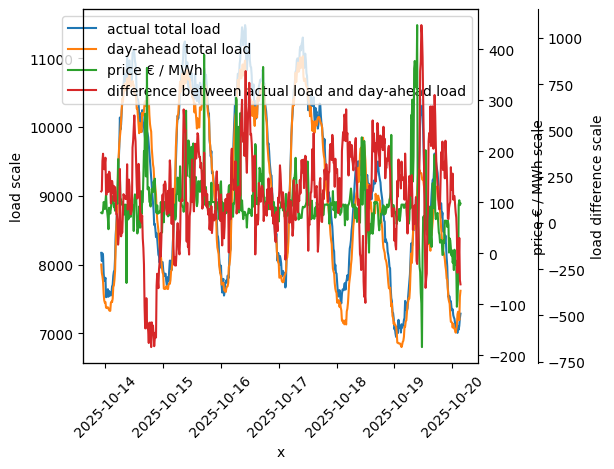

In [212]:
graph_df2 = df_combined2[df_combined2['datetime_utc'] > pd.Timestamp('2025-10-13T00:00', tz='UTC')]

x = graph_df2['datetime_utc']
y1 = graph_df2['price_eur_mwh']
y2 = graph_df2['Actual Total Load (MW)']
y3 = graph_df2['Day-ahead Total Load Forecast (MW)']
y4 = y2 - y3

fig, ax1 = plt.subplots()
plt.xticks(rotation=45)

# Left axis: y2 and y3 (same scale)
lns1 = ax1.plot(x, y2, color='C0', label='actual total load')
lns2 = ax1.plot(x, y3, color='C1', label='day-ahead total load')
ax1.set_ylabel('load scale')
ax1.tick_params(axis='y', colors='black')

# Right axis: y3
ax2 = ax1.twinx()
lns3 = ax2.plot(x, y1, color='C2', label='price € / MWh')
ax2.set_ylabel('price € / MWh scale')

# Third axis (offset right): y4
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.15))  # offset the third axis
ax3.spines['right'].set_visible(True)
lns4 = ax3.plot(x, y4, color='C3', label='difference between actual load and day-ahead load')
ax3.set_ylabel('load difference scale')

# Combine legend
lines = lns1 + lns2 + lns3 + lns4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

ax1.set_xlabel('x')

plt.tight_layout()
plt.show()

In [219]:
file_name = 'GUI_NET_CROSS_BORDER_PHYSICAL_FLOWS_202510162200-202510172200.csv'

gui_crossborder = load_gui_dayahead_data(file_name, 'MTU')
gui_crossborder['datetime_utc'] = gui_crossborder['end_datetime_utc']
print(gui_crossborder.shape)
gui_crossborder.head()

(240, 9)


,MTU,Out Area,In Area,Physical Flow (MW),start_time,end_time,start_datetime_utc,end_datetime_utc,datetime_utc
0,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),France (FR),0.00,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
1,17/10/2025 00:00:00 - 17/10/2025 01:00:00,France (FR),Belgium (BE),319.97,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
2,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),Germany (DE),0.00,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
3,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Germany (DE),Belgium (BE),289.24,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
4,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),Luxembourg (LU),143.13,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00


In [220]:
mask = gui_crossborder['Out Area'] == 'Belgium (BE)'
gui_crossborder.loc[mask, 'Physical Flow (MW)'] = -gui_crossborder.loc[mask, 'Physical Flow (MW)']

gui_crossborder.head()

,MTU,Out Area,In Area,Physical Flow (MW),start_time,end_time,start_datetime_utc,end_datetime_utc,datetime_utc
0,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),France (FR),-0.00,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
1,17/10/2025 00:00:00 - 17/10/2025 01:00:00,France (FR),Belgium (BE),319.97,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
2,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),Germany (DE),-0.00,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
3,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Germany (DE),Belgium (BE),289.24,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00
4,17/10/2025 00:00:00 - 17/10/2025 01:00:00,Belgium (BE),Luxembourg (LU),-143.13,2025-10-17,2025-10-17 01:00:00,2025-10-16 22:00:00+00:00,2025-10-16 23:00:00+00:00,2025-10-16 23:00:00+00:00


In [222]:
gui_crossborder = gui_crossborder.groupby('datetime_utc', as_index=False)['Physical Flow (MW)'].sum()
gui_crossborder.head()

,datetime_utc,Physical Flow (MW)
0,2025-10-16 23:00:00+00:00,1865.91
1,2025-10-17 00:00:00+00:00,1902.72
2,2025-10-17 01:00:00+00:00,2087.04
3,2025-10-17 02:00:00+00:00,2029.33
4,2025-10-17 03:00:00+00:00,1573.39


In [223]:
# total entries actual price: 49 559
df_combined3 = df_actual_price.merge(gui_crossborder, on='datetime_utc', how='inner')
print(df_combined3.shape)
df_combined3.head()

(24, 6)


,datetime_utc,date,hour,minute,price_eur_mwh,Physical Flow (MW)
0,2025-10-16 23:00:00+00:00,2025-10-16,23,0,77.39,1865.91
1,2025-10-17 00:00:00+00:00,2025-10-17,0,0,61.93,1902.72
2,2025-10-17 01:00:00+00:00,2025-10-17,1,0,100.00,2087.04
3,2025-10-17 02:00:00+00:00,2025-10-17,2,0,92.85,2029.33
4,2025-10-17 03:00:00+00:00,2025-10-17,3,0,116.02,1573.39


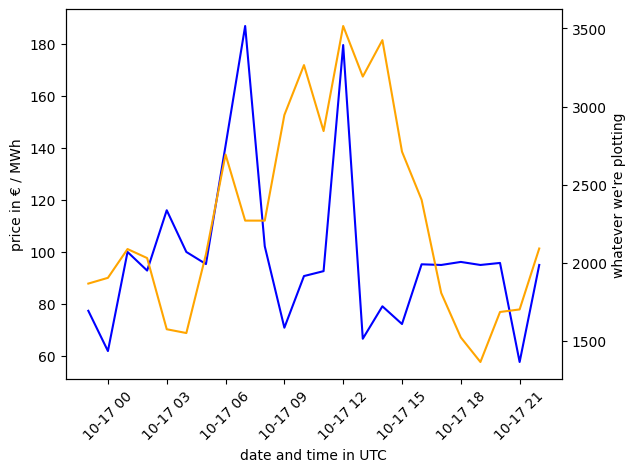

In [225]:
graph_df3 = df_combined3.dropna(subset=['datetime_utc', 'price_eur_mwh', 'Physical Flow (MW)'])

x = graph_df3['datetime_utc']
y1 = graph_df3['price_eur_mwh']
y2 = graph_df3['Physical Flow (MW)']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('date and time in UTC')
ax1.set_ylabel('price in € / MWh')

plt.xticks(rotation=45)

ax2 = ax1.twinx()                 # second x-axis on top
ax2.plot(x, y2, color='orange')
ax2.set_ylabel('whatever we\'re plotting')

plt.show()